In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

In [2]:
df = pd.read_csv('webmd.csv')

In [3]:
df.shape

(362806, 12)

In [4]:
df2 = df[[ 'Condition', 'Drug','Age', 'Sex', 'EaseofUse', 'Effectiveness', 'Satisfaction',  'Reviews',  'Sides']]
df2.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides
0,Stuffy Nose,25dph-7.5peh,75 or over,Male,5,5,5,I'm a retired physician and of all the meds I ...,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,Cold Symptoms,25dph-7.5peh,25-34,Female,5,5,5,cleared me right up even with my throat hurtin...,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,Other,warfarin (bulk) 100 % powder,65-74,Female,2,3,3,why did my PTINR go from a normal of 2.5 to ov...,
3,Other,warfarin (bulk) 100 % powder,75 or over,Female,2,2,1,FALLING AND DON'T REALISE IT,
4,Other,warfarin (bulk) 100 % powder,35-44,Male,1,1,1,My grandfather was prescribed this medication ...,


In [5]:
df2.count()

Condition        362806
Drug             362806
Age              362806
Sex              362806
EaseofUse        362806
Effectiveness    362806
Satisfaction     362806
Reviews          362769
Sides            362806
dtype: int64

In [6]:
df.eq(' ').sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41824
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [7]:
uniqueValues = df2.nunique(dropna=True)
print("Count Unique values in each column including NaN")
print(uniqueValues)

Count Unique values in each column including NaN
Condition          1806
Drug               7093
Age                  12
Sex                   3
EaseofUse             7
Effectiveness         7
Satisfaction          7
Reviews          250167
Sides              1651
dtype: int64


In [8]:
df2[df2.duplicated()].shape

(8118, 9)

In [9]:
df3=df2.drop_duplicates()

In [10]:
df3.eq(' ').sum()

Condition           43
Drug                 0
Age              11738
Sex              26001
EaseofUse            0
Effectiveness        0
Satisfaction         0
Reviews          34660
Sides            16973
dtype: int64

<AxesSubplot:>

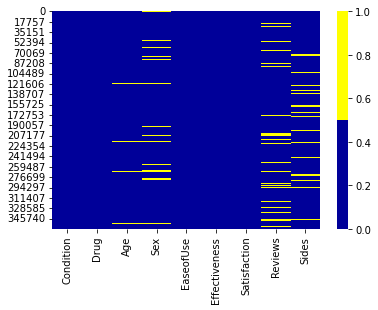

In [11]:
import seaborn as sns
cols = df3.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df3[cols].eq(' '),
            cmap=sns.color_palette(colours))

In [12]:
df3=df3.replace('',np.nan,regex=True).replace(' ',np.nan)

In [13]:
df3.isna().sum()

Condition           43
Drug                 0
Age              11738
Sex              26001
EaseofUse            0
Effectiveness        0
Satisfaction         0
Reviews          34697
Sides            16973
dtype: int64

In [14]:
df4=df3.dropna()

In [15]:
df4.eq('').sum()

Condition        0
Drug             0
Age              0
Sex              0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Reviews          0
Sides            0
dtype: int64

In [16]:
df4.shape

(279672, 9)

<AxesSubplot:>

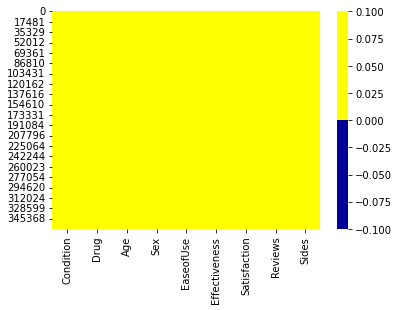

In [17]:
import seaborn as sns
cols = df4.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df4[cols].isna(),
            cmap=sns.color_palette(colours))

## Data visualization

In [18]:
!pip install WordCloud
!pip install STOPWORDS

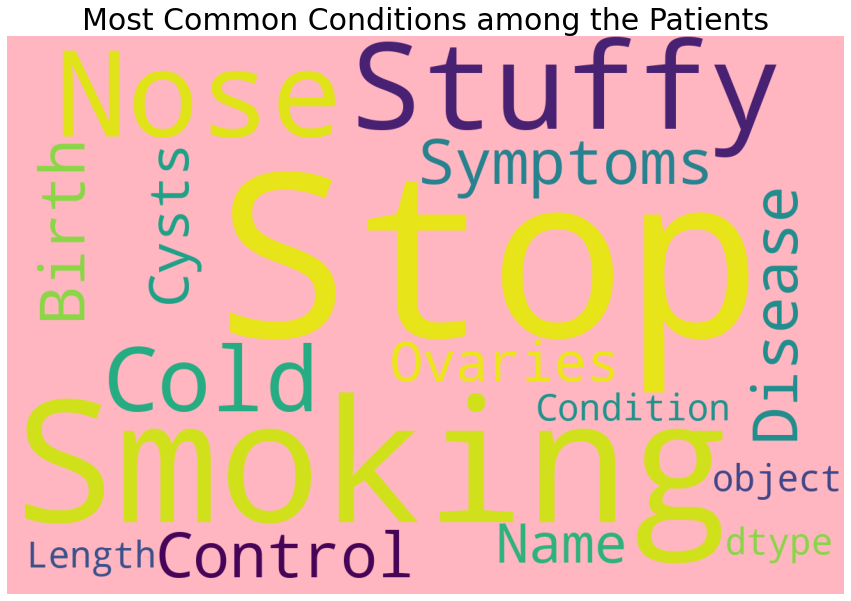

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightpink', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df4['Condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Graphical representation of most popular drug that patient prefers

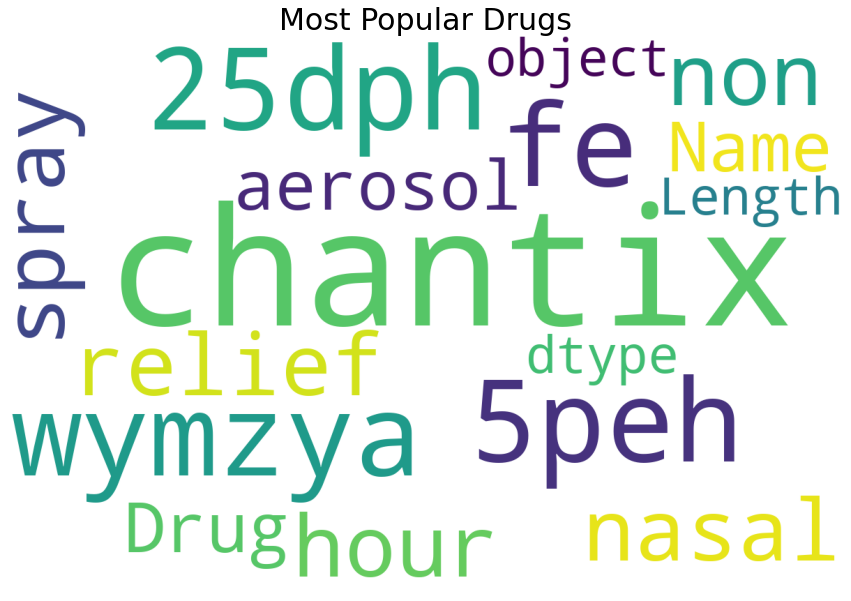

In [20]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df4['Drug']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Checking the most popular drug per condition

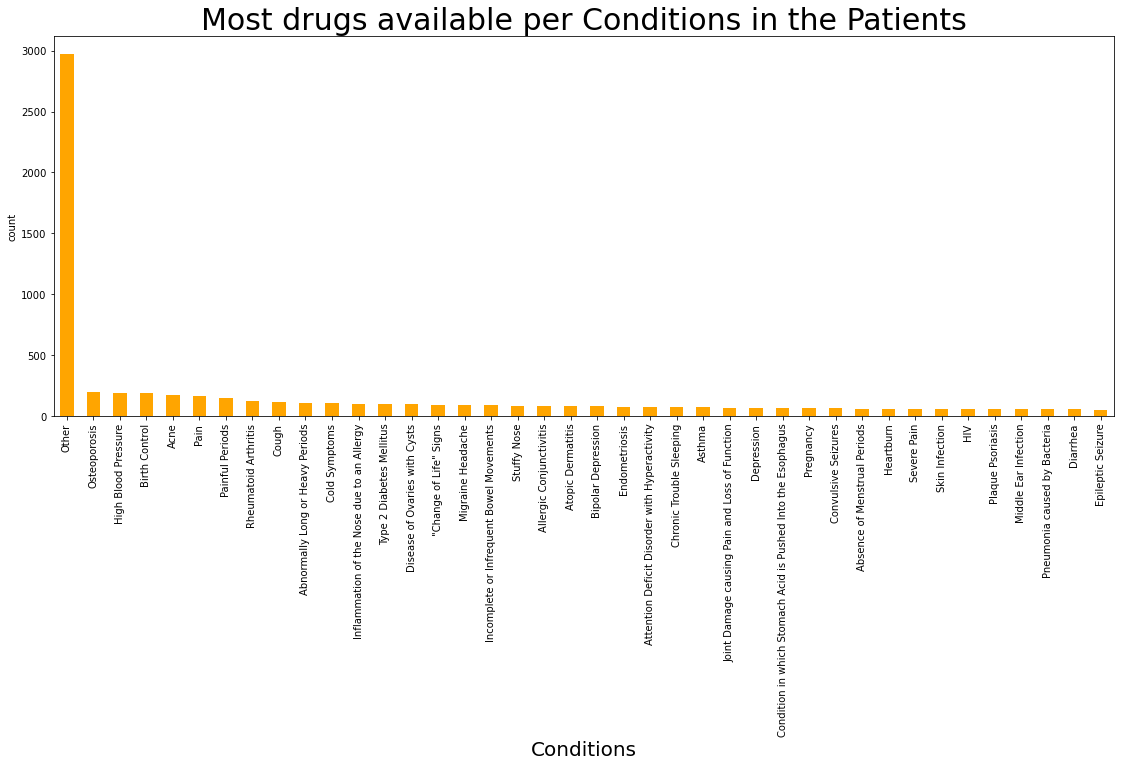

In [21]:
df4.groupby(['Condition'])['Drug'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'Orange')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

## Checking the most popular drug per condition

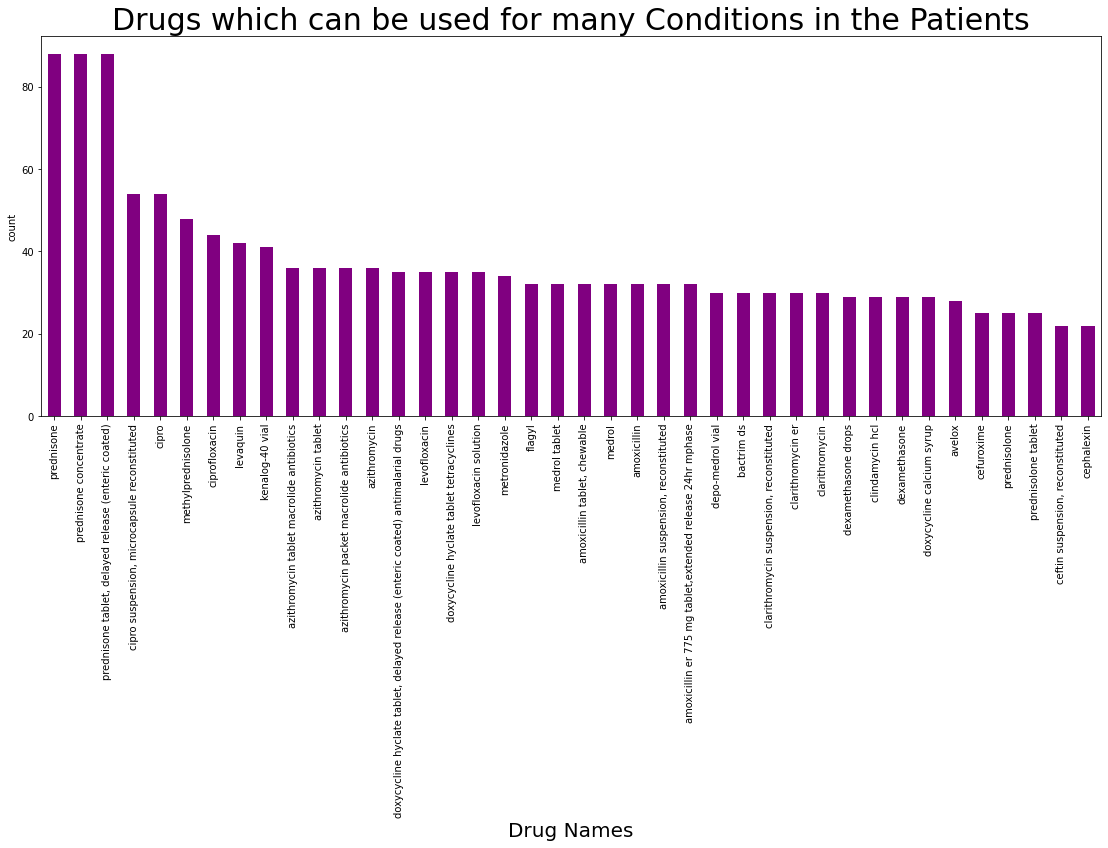

In [22]:
df4.groupby(['Drug'])['Condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()


## Checking the different types of conditions patients

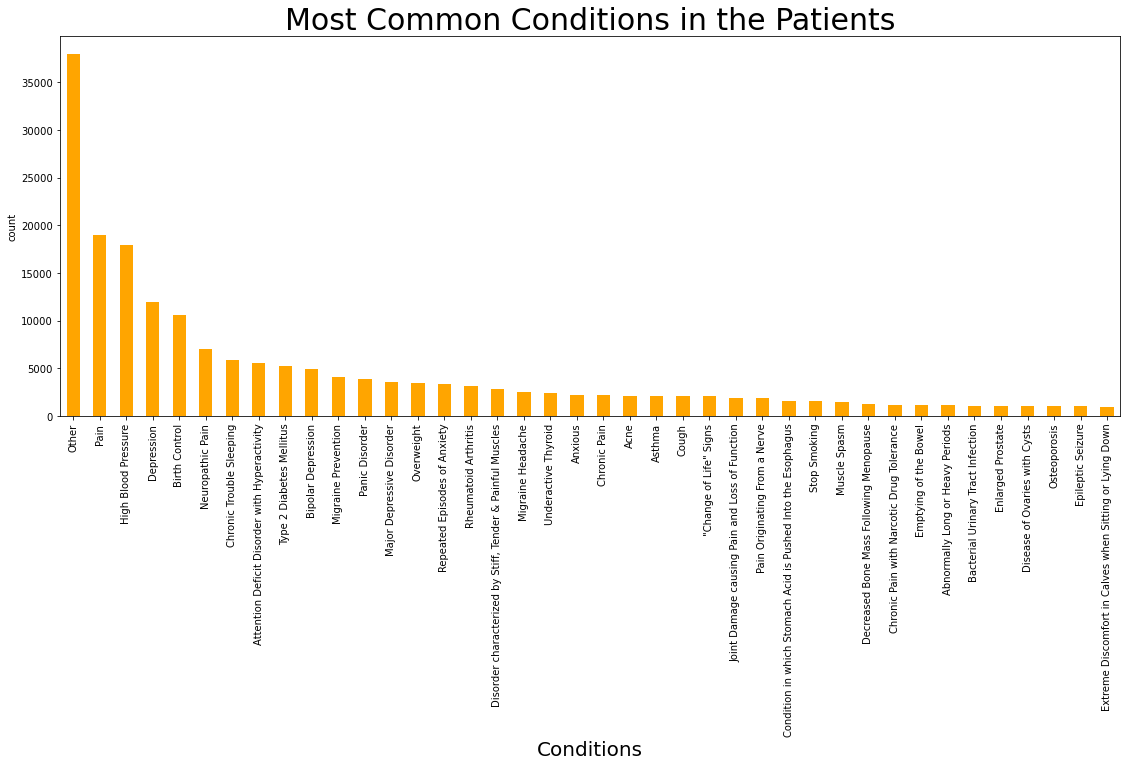

In [23]:
df4['Condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'Orange')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

### Let's read some reviews

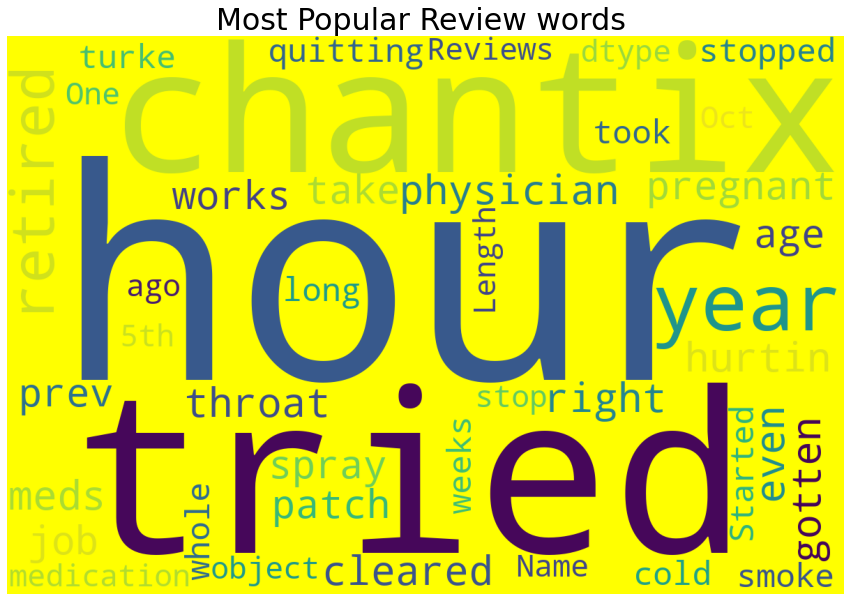

In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(df4['Reviews']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Review words ', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

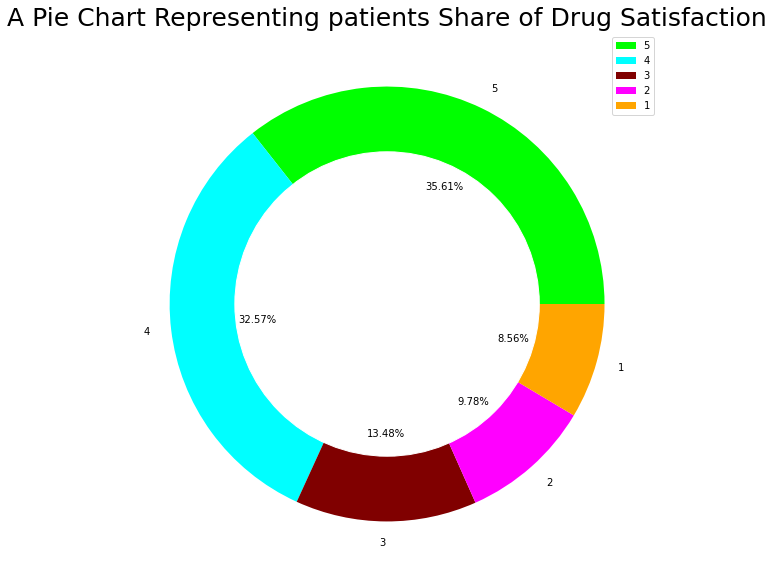

In [25]:
size = [6556, 5996, 2482, 1800, 1576]
colors = ['lime', 'cyan', 'maroon',  'magenta', 'orange']
labels = "5", "4", "3", "2", "1"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing patients Share of Drug Satisfaction', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

##  Data Cleaning using Natural Language Processing

In [26]:
!pip install nltk
!pip install stopwords

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekjha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:

import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [29]:
df4["Reviews"]=df4['Reviews'].astype('str')

/var/folders/8f/f_vht8sx6l54hbgzsl80w27w0000gn/T/ipykernel_2343/1860888351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Reviews"]=df4['Reviews'].astype('str')


In [30]:
df4['Reviews'] = df4["Reviews"].apply(clean)


/var/folders/8f/f_vht8sx6l54hbgzsl80w27w0000gn/T/ipykernel_2343/472286864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Reviews'] = df4["Reviews"].apply(clean)


In [31]:
df4.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides
0,Stuffy Nose,25dph-7.5peh,75 or over,Male,5,5,5,im a retired physician and of all the meds i h...,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,Cold Symptoms,25dph-7.5peh,25-34,Female,5,5,5,cleared me right up even with my throat hurtin...,"Drowsiness, dizziness , dry mouth /nose/thro..."
6,Birth Control,wymzya fe,25-34,Female,5,5,2,havent gotten pregnant so it does its job i wa...,"Nausea , vomiting , headache , bloating , ..."
7,Disease of Ovaries with Cysts,wymzya fe,45-54,Female,5,5,5,i have take this for years age to prevent ov...,"Nausea , vomiting , headache , bloating , ..."
9,Stuffy Nose,"12 hour nasal relief spray, non-aerosol",55-64,Male,4,2,2,the hour spray only works for me for hours,"Temporary burning, stinging, dryness in the no..."


In [32]:
df4.to_csv('fresh_cleaned_new.csv', index = False)

In [33]:
#stratified sampling only with many classes with minimum length or max=x

df5 = df4.groupby(['Condition','Drug', 'Age', 'Sex'], group_keys=False).apply(lambda x: x.sample(min(len(x), 20)))

In [34]:
df6 = df5.groupby('Condition', group_keys=False).apply(lambda x: x.sample(frac =.5,replace = False)) 

In [35]:
df6.shape

(103462, 9)

In [36]:
df6.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides
357253,"""Change of Life"" Signs",celexa,45-54,Female,3,3,2,i have not noticed other side effects other th...,"Nausea , dry mouth , loss of appetite, tiredn..."
33448,"""Change of Life"" Signs",lexapro,45-54,Female,5,5,4,good,"Nausea , dry mouth , trouble sleeping , con..."
136834,"""Change of Life"" Signs",paroxetine hcl,45-54,Female,3,3,5,i have been more cheerful and resting more but...,"Nausea , drowsiness, dizziness , trouble sle..."
308002,"""Change of Life"" Signs",duavee,35-44,Female,5,4,4,the first week i got rather warm at night not ...,"Stomach upset, nausea / vomiting , bloating..."
253675,"""Change of Life"" Signs","estradiol spray, non-aerosol",65-74,Female,5,5,5,another year old on estradiol and doctors wan...,"Nausea / vomiting , bloating , breast tende..."


Saving final cleaned data for the model

In [37]:
# This Cleaned data will be used for the modeling.
df6.to_csv('fresh_cleaned_short_new.csv', index = False)